# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

---
Dataset berasal dari [kaggle](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data), yang berisi tentang list game Steam 2024.

Data di unggah melalui github untuk keperluan untuk download menggunakan `wget`

In [39]:
## Get the Dataset using github.
!wget https://raw.githubusercontent.com/archiseino/Dicoding---Basic-ML/refs/heads/main/dataset_steam.csv

--2024-12-18 19:12:25--  https://raw.githubusercontent.com/archiseino/Dicoding---Basic-ML/refs/heads/main/dataset_steam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180690 (176K) [text/plain]
Saving to: ‘dataset_steam.csv.1’

dataset_steam.csv.1 100%[===================>] 176.46K  --.-KB/s    in 0.03s   

2024-12-18 19:12:25 (5.08 MB/s) - ‘dataset_steam.csv.1’ saved [180690/180690]



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [40]:
## Numpy and Pandas for Data Operation
import numpy as np
import pandas as pd

## Plotting Graph
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Sklearn K-Means Algo
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import silhouette_score

## Labeling Cluster
from sklearn.preprocessing import LabelEncoder as le
from sklearn.decomposition import PCA
from scipy.spatial import distance

## Scaling Features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import SequentialFeatureSelector

## K-Medoids (Since K-Means is not enough)
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

## Check the Optimal Cluster
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [41]:
## Load the Dataset
data = pd.read_csv("dataset_steam.csv")

## Identify Numerical and Categorical Columns
numerical_cols = ['copiesSold', 'price', 'revenue', 'avgPlaytime', 'reviewScore']
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
encoded_cols = ["publisherClass"]

## Numerical data
numerical_data = data[numerical_cols]

## Categorical data
categorical_data = data[categorical_cols]

## Categorical data for encoding
encoded_data = data[encoded_cols]

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Encoded Columns:", encoded_cols)

data.info()

Numerical Columns: ['copiesSold', 'price', 'revenue', 'avgPlaytime', 'reviewScore']
Categorical Columns: Index(['name', 'releaseDate', 'publisherClass', 'publishers', 'developers'], dtype='object')
Encoded Columns: ['publisherClass']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1499 non-null   object 
 9   developers      1498 non-null   object 
 10  steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

---
Akan dilihat distribusi dari data numeric serta kategorikal, serta matriks korelasi dari feature numerik.

Banyak juga developer game indie.

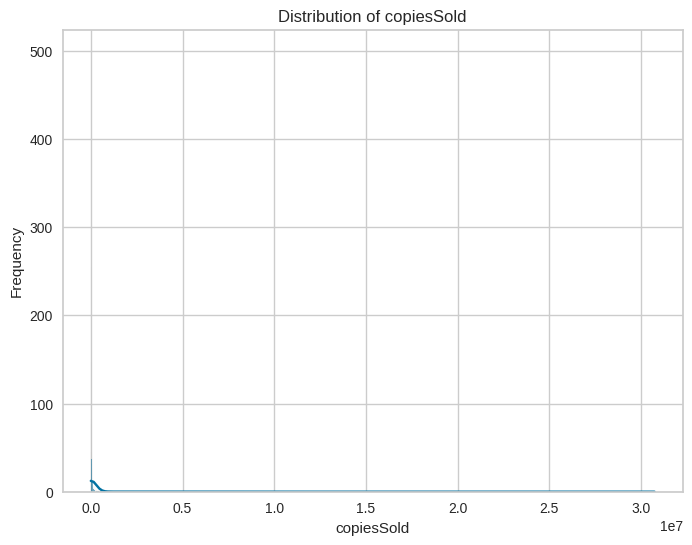

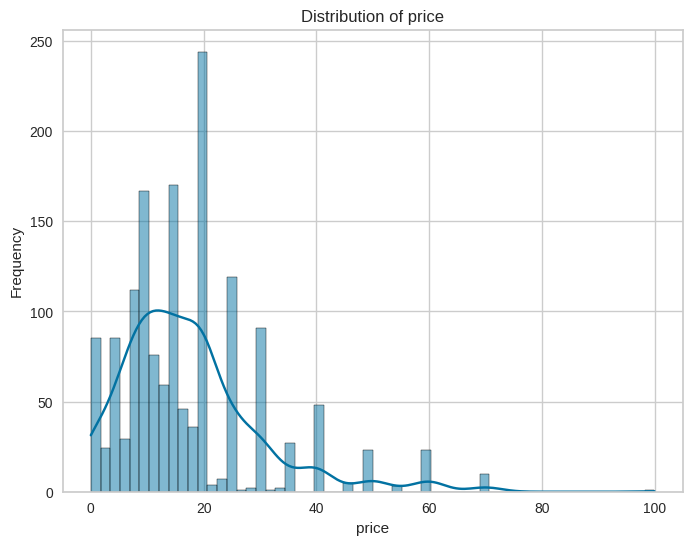

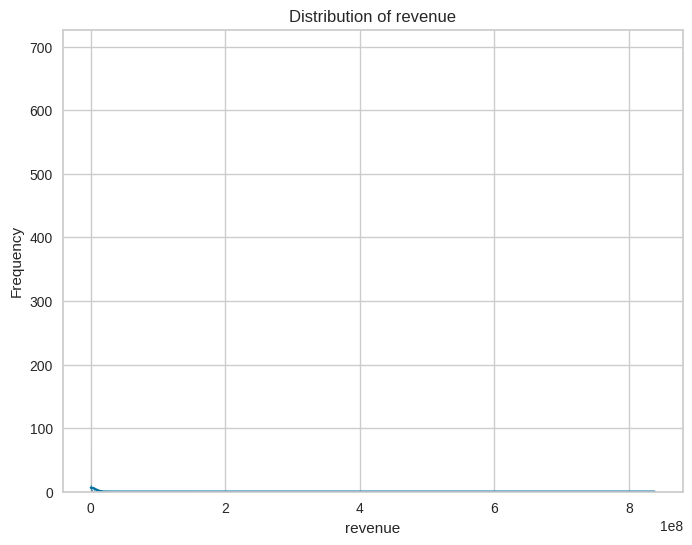

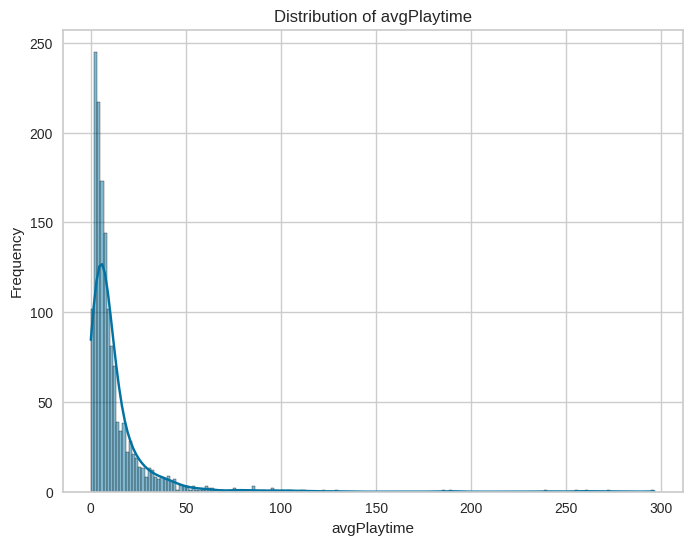

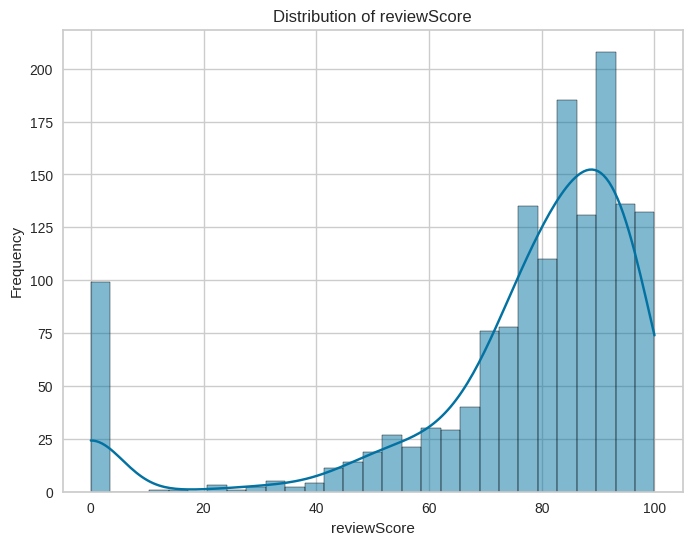

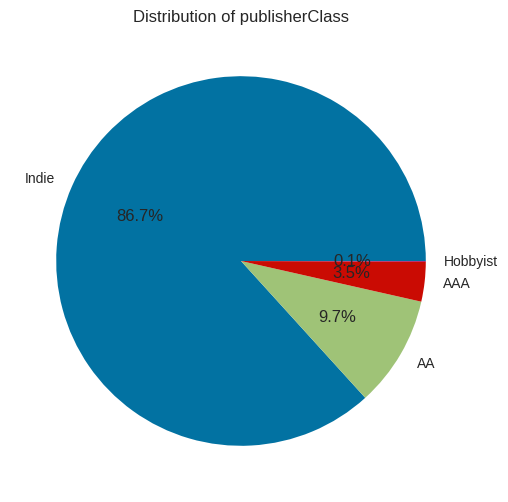

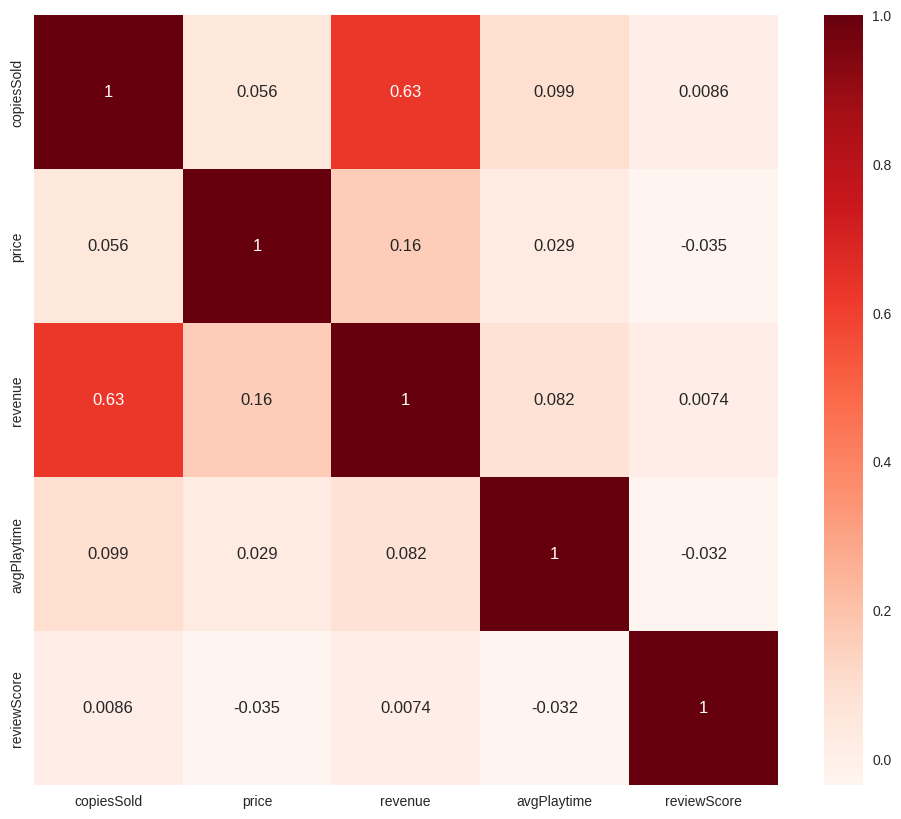

In [42]:
# Plotting the distribution of numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plotting the distribution of categorical features
for col in encoded_cols:
    plt.figure(figsize=(8, 6))
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.ylabel('')
    plt.show()

# Correlation Matrix
plt.figure(figsize=(12,10))
cor = numerical_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [43]:
## Put the Encoded Label with One-Hot Encoding
encoded_data = pd.get_dummies(encoded_data, columns=encoded_cols, drop_first=True, dtype="int64")
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   publisherClass_AAA       1500 non-null   int64
 1   publisherClass_Hobbyist  1500 non-null   int64
 2   publisherClass_Indie     1500 non-null   int64
dtypes: int64(3)
memory usage: 35.3 KB


In [44]:
## Merge encoded data with numerical_data
combined_data = pd.concat([numerical_data, encoded_data], axis=1)
combined_labels = combined_data.columns

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   copiesSold               1500 non-null   int64  
 1   price                    1500 non-null   float64
 2   revenue                  1500 non-null   float64
 3   avgPlaytime              1500 non-null   float64
 4   reviewScore              1500 non-null   int64  
 5   publisherClass_AAA       1500 non-null   int64  
 6   publisherClass_Hobbyist  1500 non-null   int64  
 7   publisherClass_Indie     1500 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 93.9 KB


In [45]:
## Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1499 non-null   object 
 9   developers      1498 non-null   object 
 10  steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


In [46]:
## Check the Description of the Dataset
data.describe(include="all")

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
count,1500,1500,1.500000e+03,1500.000000,1.500000e+03,1500.000000,1500.000000,1500,1499,1498,1.500000e+03
unique,1500,235,NaN,NaN,NaN,NaN,NaN,4,1131,1406,NaN
top,WWE 2K24,07-03-2024,NaN,NaN,NaN,NaN,NaN,Indie,Kagura Games,Lust Desires 🖤,NaN
freq,1,27,NaN,NaN,NaN,NaN,NaN,1301,17,9,NaN
mean,NaN,NaN,1.414826e+05,17.519513,2.632382e+06,12.562704,76.201333,NaN,NaN,NaN,2.183788e+06
std,NaN,NaN,1.132757e+06,12.646612,2.781024e+07,21.542173,24.319438,NaN,NaN,NaN,6.067725e+05
min,NaN,NaN,5.930000e+02,0.000000,2.067400e+04,0.000000,0.000000,NaN,NaN,NaN,2.488000e+04
25%,NaN,NaN,4.918750e+03,9.990000,4.550425e+04,3.564848,72.000000,NaN,NaN,NaN,1.792795e+06
50%,NaN,NaN,1.192850e+04,14.990000,1.090530e+05,6.762776,83.000000,NaN,NaN,NaN,2.321985e+06
75%,NaN,NaN,3.786975e+04,19.990000,4.551568e+05,13.104473,92.000000,NaN,NaN,NaN,2.693228e+06


In [47]:
## Checking the Missing Value
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0
publishers,1
developers,2


In [48]:
## Fill the missing developers with "-"
data['publishers'] = data['publishers'].fillna('-')
data['developers'] = data['developers'].fillna('-')

## Checking the Missing Value
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0


Dataset numerik memiliki banyak outlier, metode untuk menanangani ini adalah dengan IQR

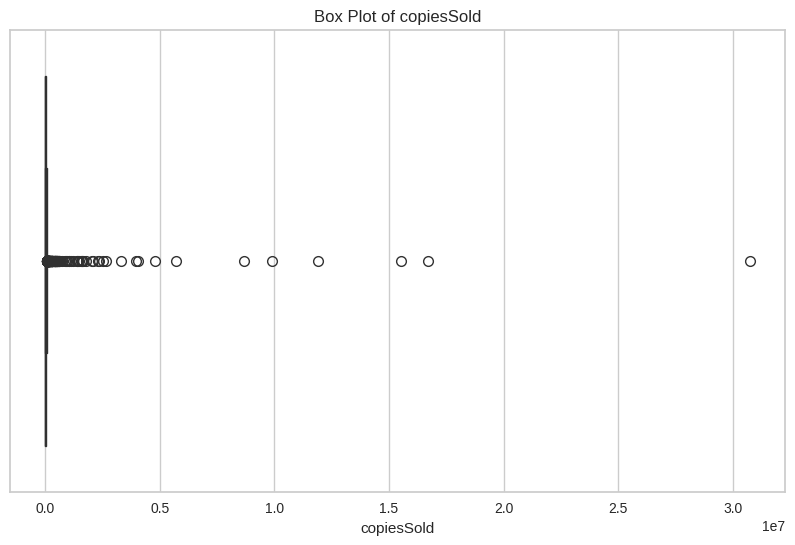

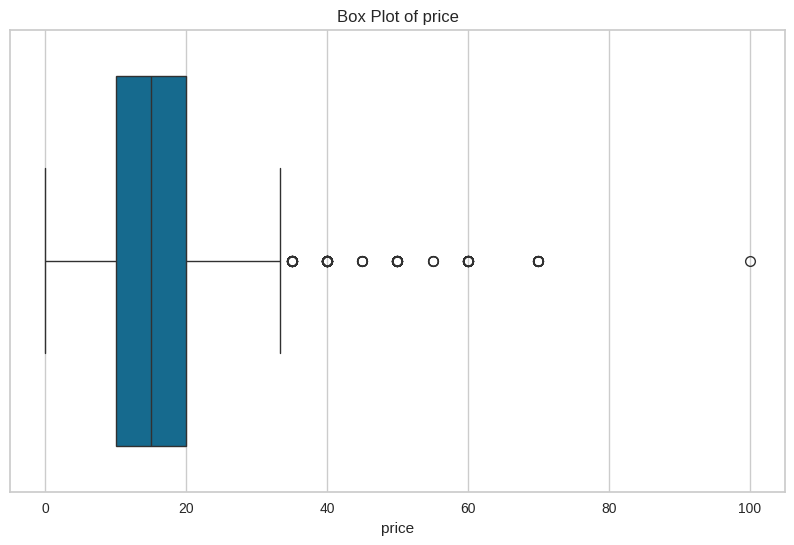

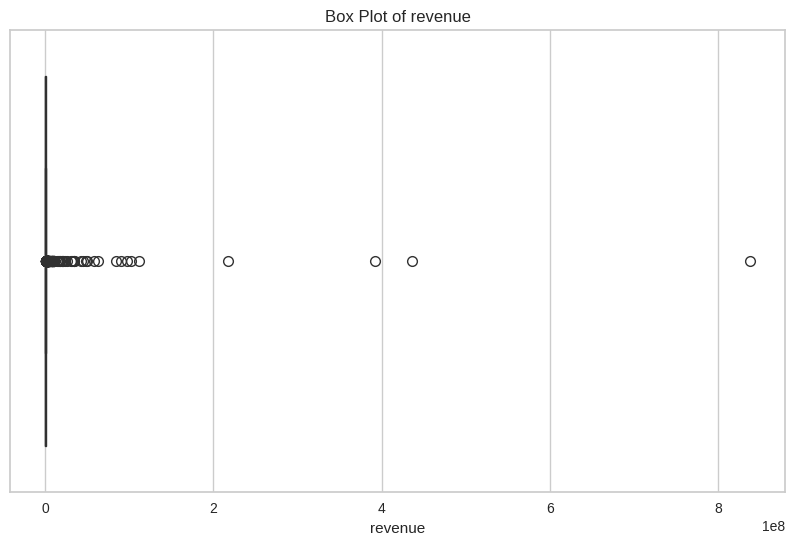

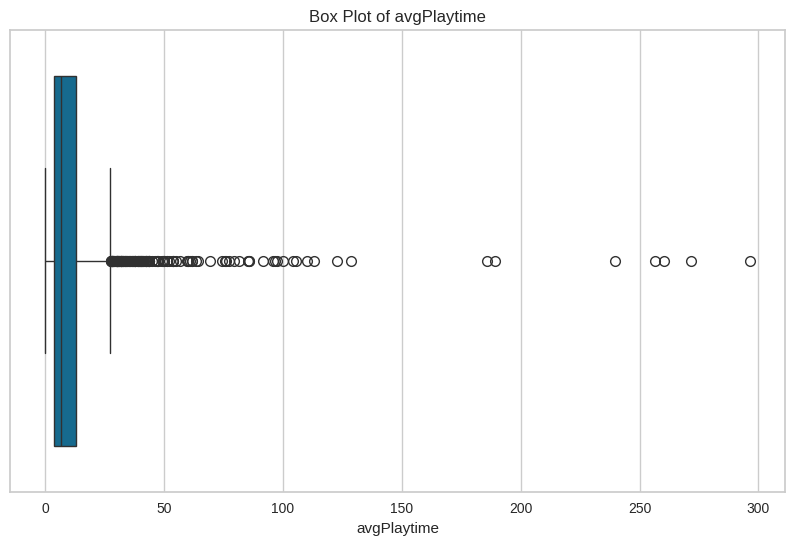

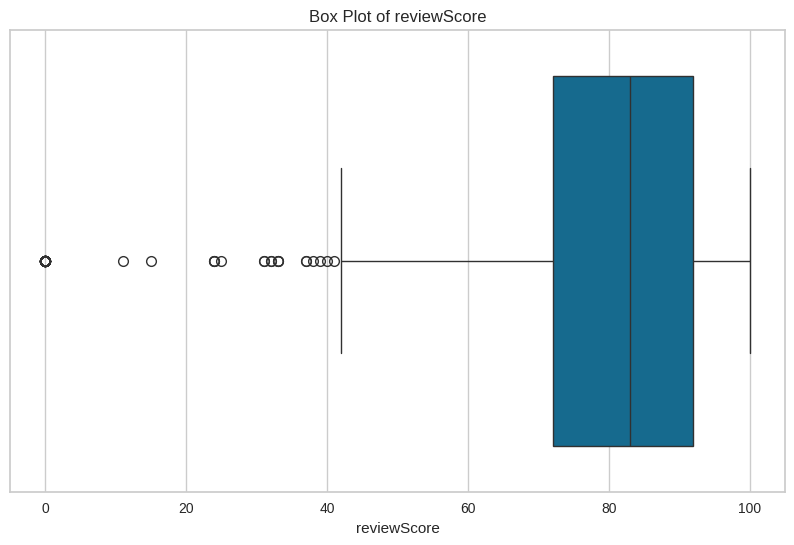

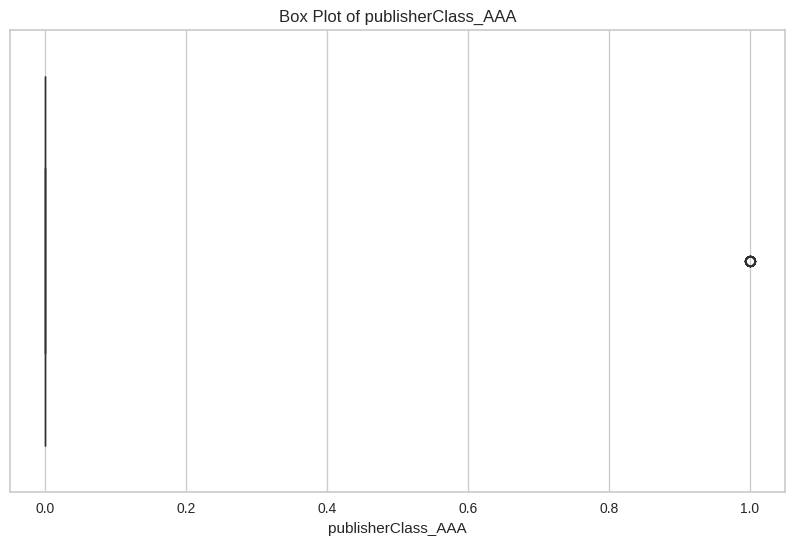

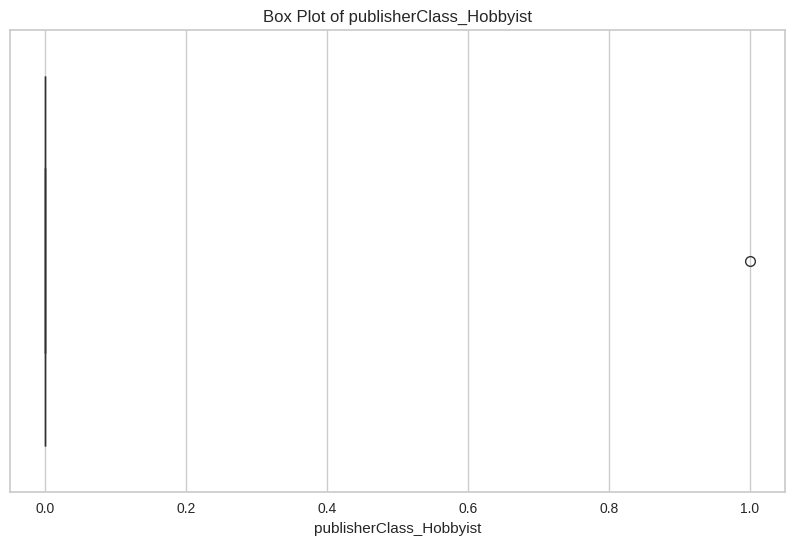

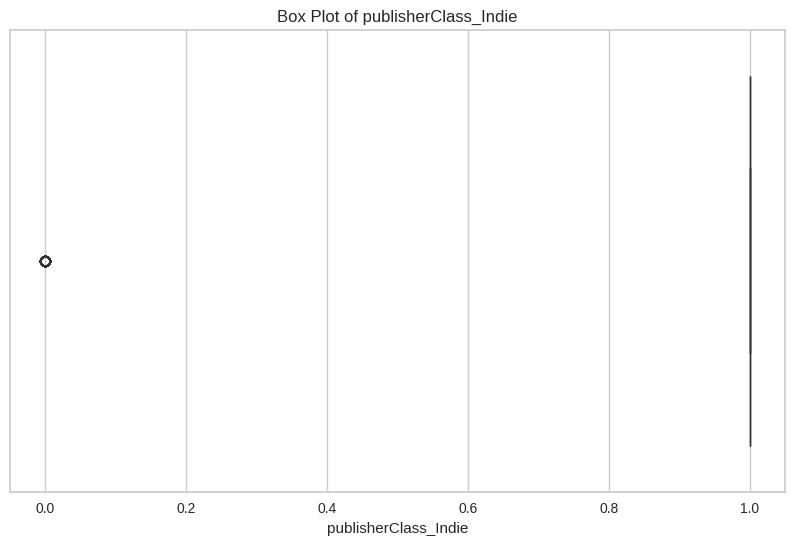

In [49]:
## Checking on the Outlier
for feature in combined_data:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=combined_data[feature])
  plt.title(f"Box Plot of {feature}")
  plt.show()

In [50]:
## Identifying the IQR
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

## Identifying the Outlier
outliers = ~((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)

## Store the new Data after removing outlier
data = data[outliers]
combined_data = combined_data[outliers]
numerical_data = numerical_data[outliers]
categorical_data = categorical_data[outliers]
encoded_data = encoded_data[outliers]

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 50 to 1449
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   copiesSold               1018 non-null   int64  
 1   price                    1018 non-null   float64
 2   revenue                  1018 non-null   float64
 3   avgPlaytime              1018 non-null   float64
 4   reviewScore              1018 non-null   int64  
 5   publisherClass_AAA       1018 non-null   int64  
 6   publisherClass_Hobbyist  1018 non-null   int64  
 7   publisherClass_Indie     1018 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 71.6 KB


In [51]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 50 to 1449
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1018 non-null   object
 1   releaseDate     1018 non-null   object
 2   publisherClass  1018 non-null   object
 3   publishers      1017 non-null   object
 4   developers      1016 non-null   object
dtypes: object(5)
memory usage: 47.7+ KB


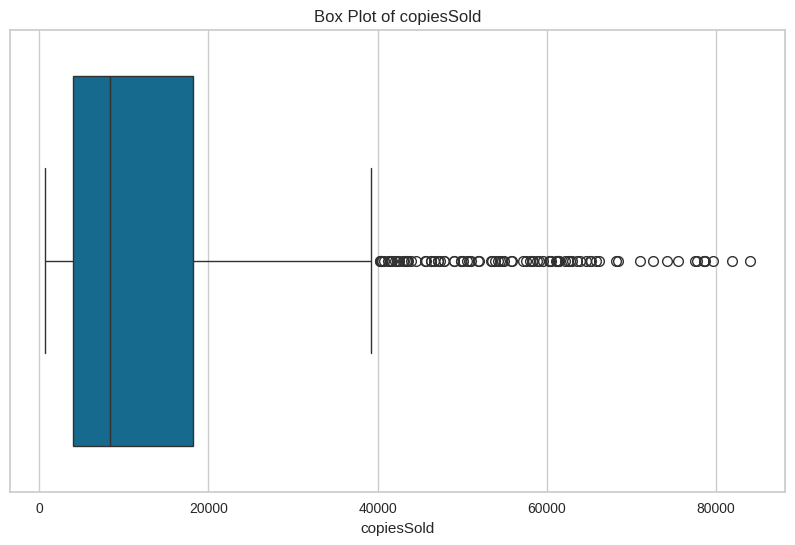

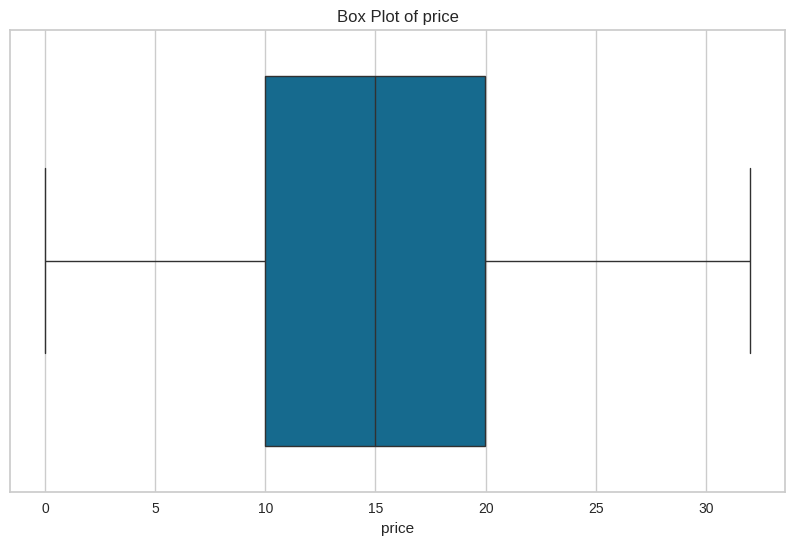

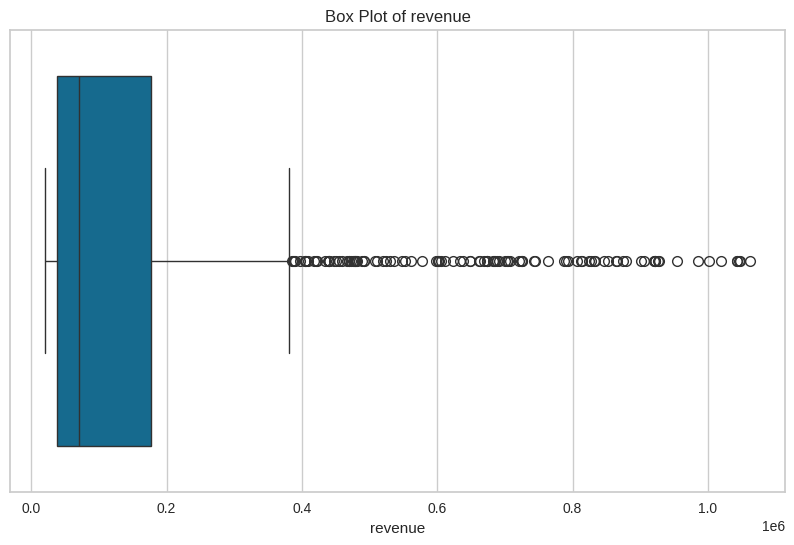

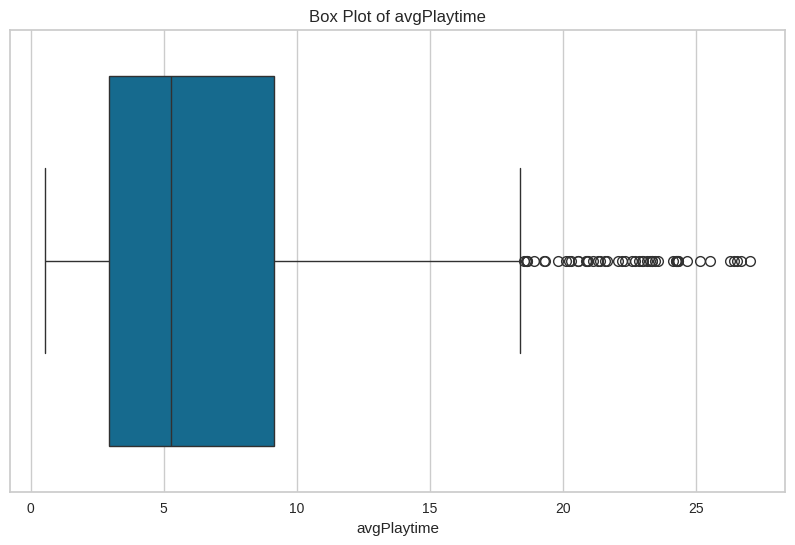

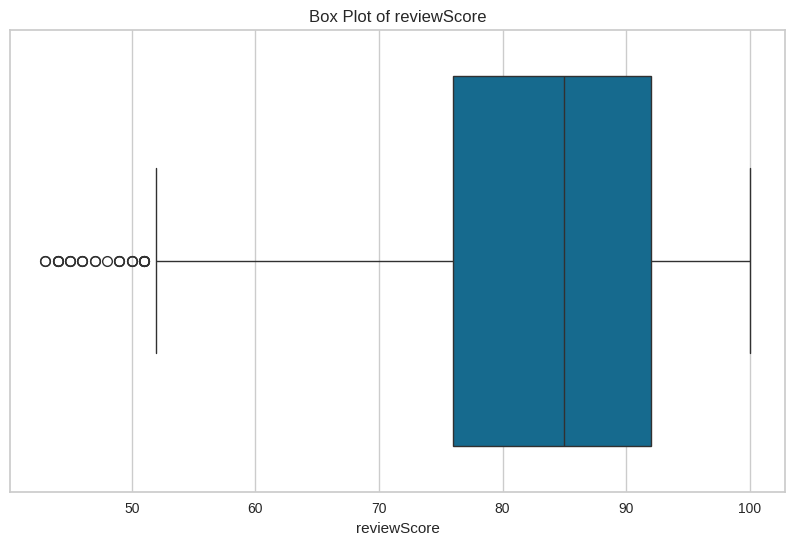

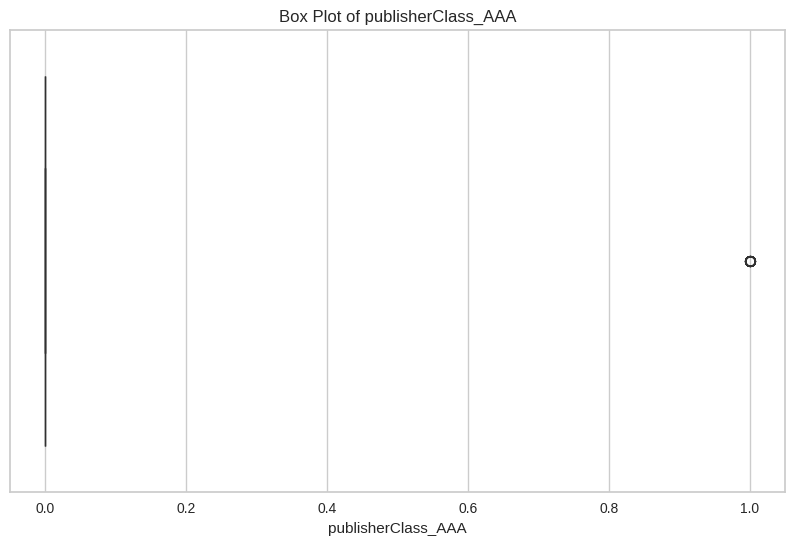

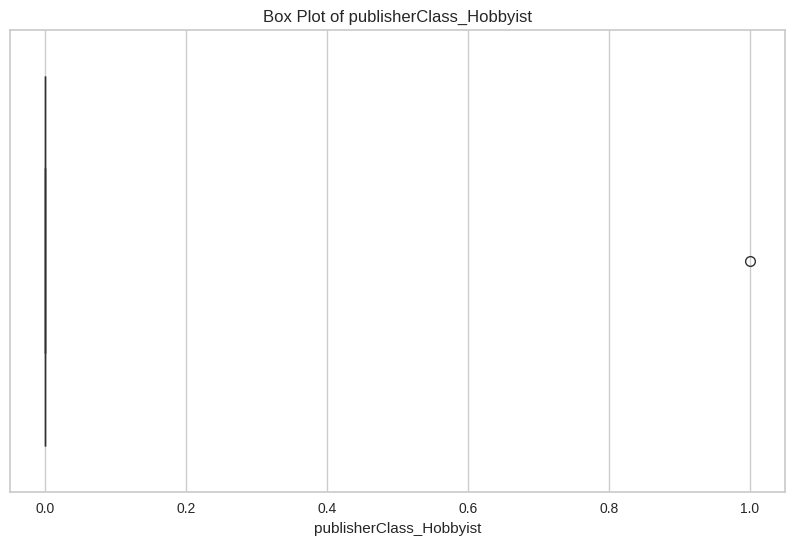

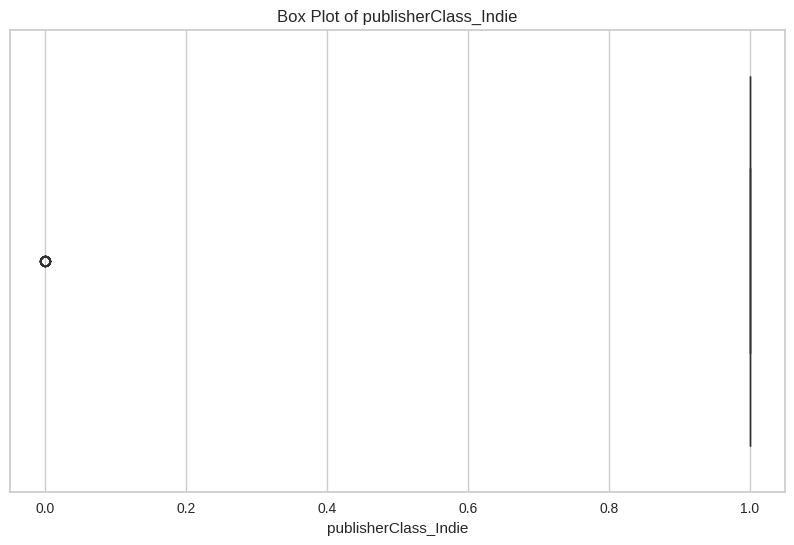

In [52]:
## Checking on the Outlier After IQR
for feature in combined_data:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=combined_data[feature])
  plt.title(f"Box Plot of {feature}")
  plt.show()

In [53]:
## Look the final datset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 50 to 1449
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1018 non-null   object 
 1   releaseDate     1018 non-null   object 
 2   copiesSold      1018 non-null   int64  
 3   price           1018 non-null   float64
 4   revenue         1018 non-null   float64
 5   avgPlaytime     1018 non-null   float64
 6   reviewScore     1018 non-null   int64  
 7   publisherClass  1018 non-null   object 
 8   publishers      1018 non-null   object 
 9   developers      1018 non-null   object 
 10  steamId         1018 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 95.4+ KB


In [54]:
## Check data after outlier removal
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 50 to 1449
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   copiesSold               1018 non-null   int64  
 1   price                    1018 non-null   float64
 2   revenue                  1018 non-null   float64
 3   avgPlaytime              1018 non-null   float64
 4   reviewScore              1018 non-null   int64  
 5   publisherClass_AAA       1018 non-null   int64  
 6   publisherClass_Hobbyist  1018 non-null   int64  
 7   publisherClass_Indie     1018 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 71.6 KB


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [55]:
## Normalize the data
robust_scaler = RobustScaler()
data_unscaled = combined_data.copy()
data_scaled = robust_scaler.fit_transform(data_unscaled)

data_scaled = pd.DataFrame(data_scaled, columns=combined_labels)
data_scaled.describe(include="all")

,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass_AAA,publisherClass_Hobbyist,publisherClass_Indie
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,0.438488,-0.057323,0.625139,0.261222,-0.137770,0.017682,0.000982,-0.073674
std,1.115420,0.708171,1.467250,0.861566,0.757231,0.131857,0.031342,0.261368
min,-0.535781,-1.499000,-0.355452,-0.763855,-2.625000,0.000000,0.000000,-1.000000
25%,-0.303143,-0.500000,-0.231196,-0.377030,-0.562500,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.696857,0.500000,0.768804,0.622970,0.437500,0.000000,0.000000,0.000000
max,5.327924,1.701000,7.162194,3.513732,0.937500,1.000000,1.000000,0.000000


In [56]:
## Setup PCA dengan 95 % Variance (5% informasi hilang)
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(data_scaled)

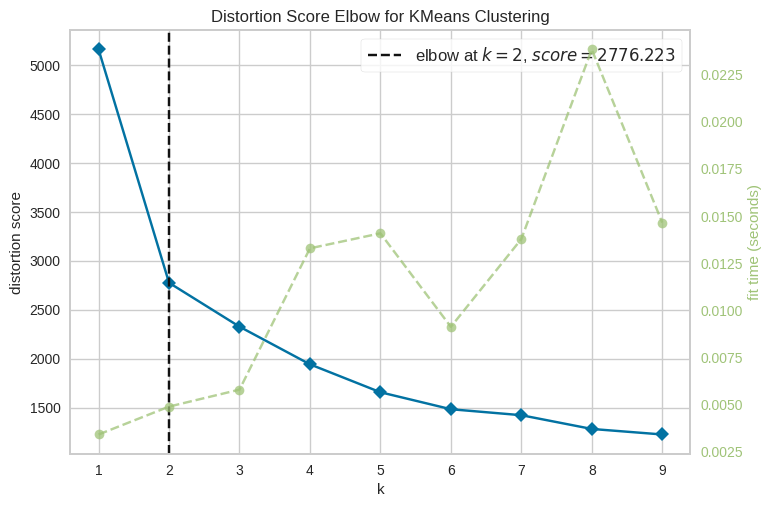

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
## Show the Visualizer Kelbow for optimum cluster number
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(pca_data)
visualizer.show()

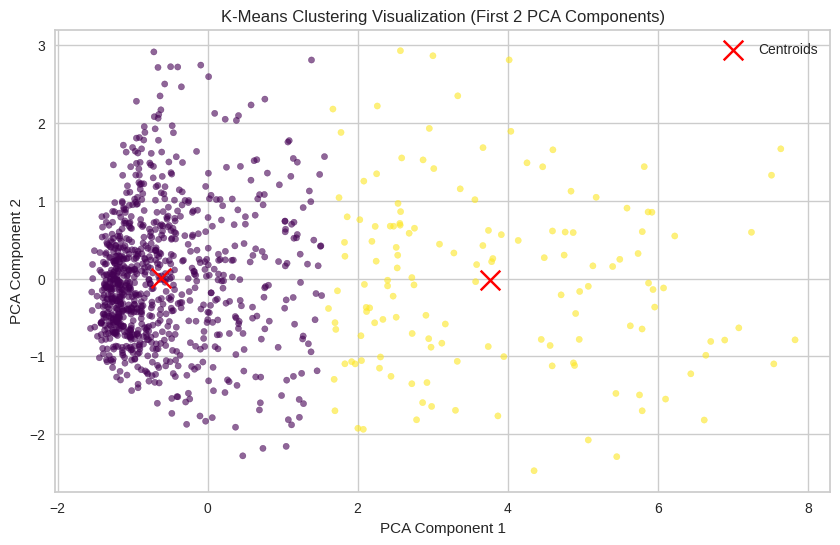

In [58]:
# K-Means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(pca_data)

## Visualize PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=20, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering Visualization (First 2 PCA Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

---

Secara teknis kluster ini sudah cukup baik dan sudah menjadi bare minimum untuk penyelesaian. Disisi lain dimensi feature juga yang semakin banyak mungkin akan sulit untuk divisualisasikan dan dikelompokan secara efektif.

Hal ini sering disebut sebagai ***curse of dimensionality***


In [59]:
# Fit KMeans again
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)  # Use PCA-transformed data

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_data, cluster_labels)
print(f"The average silhouette score is: {silhouette_avg:.4f}")

The average silhouette score is: 0.5548


In [60]:
## Calculate the Performance per cluster Cluster
wcss = []
silhouette_scores = []
cluster_range = range(2, 10)  # Test for 2 to 9 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(pca_data)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

(wcss, silhouette_scores)

([2776.2227167741744,
  2296.4370770494465,
  1941.6939546793956,
  1658.3166441052956,
  1484.3231944295178,
  1343.400529609402,
  1238.9234509947578,
  1172.0292697330078],
 [0.5547763556973082,
  0.37617764534236015,
  0.31365777994015553,
  0.25981845108292473,
  0.23537841293990625,
  0.23886481428808948,
  0.23815015797609496,
  0.2307010976630493])

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

---
Meskipun secara teknis cluster sudah bare minimum, kita bisa mencoba untuk melakukan improvisasi pada pemilihan feature untuk meningkatkan nilai dari silhouette score, disisi lain penggunaan PCA juga membantu untuk mereduksi dimensi berdasarkan variansi data.

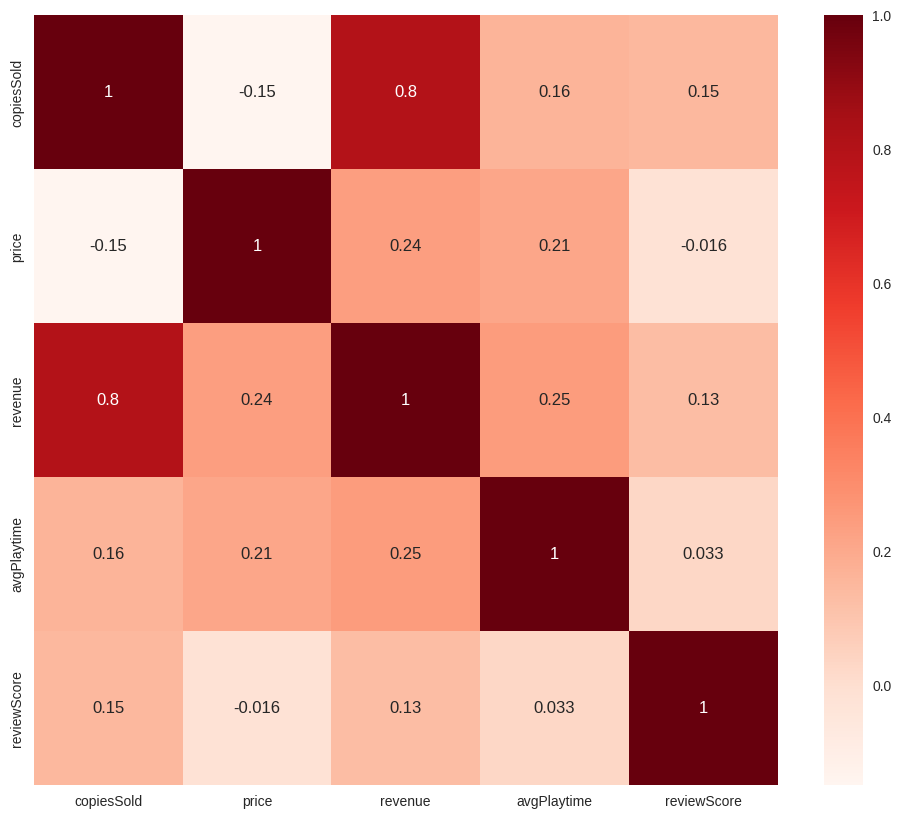

In [61]:
### Show Correlation Matrix on What should be removed
# Correlation Matrix
plt.figure(figsize=(12,10))
cor = numerical_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Kita memiliki feature revenue dan copiesSold yang memiliki korelasi yang cukup tinggi, tentu ini akan membuat kluster menjadi tidak tersebar lebih rata.

Disisi lain, kita dapat menggunakan alat bantu seperti `SequentialFeatureSelector` untuk menentukan feature yang cocok dengan melihat performa feature oleh KMeans, disini akan diuji `combine_data` untuk melihat potensi reduksi feature.

In [62]:
## Drop copiesSold and revenue since it was correlated
updated_combined_data = combined_data.drop(columns=['copiesSold', 'revenue']).copy()
updated_combined_labels = updated_combined_data.columns

updated_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 50 to 1449
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    1018 non-null   float64
 1   avgPlaytime              1018 non-null   float64
 2   reviewScore              1018 non-null   int64  
 3   publisherClass_AAA       1018 non-null   int64  
 4   publisherClass_Hobbyist  1018 non-null   int64  
 5   publisherClass_Indie     1018 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 55.7 KB


In [63]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(updated_combined_data)

# Define the range of clusters
n_clusters_range = range(2, 11)  # 2 to 10 clusters

# Store results
results = []

for n_clusters in n_clusters_range:
    print(f"Running for {n_clusters} clusters...")

    # Step 1: Cluster the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_

    # Step 2: Evaluate clustering performance (e.g., Silhouette score)
    silhouette_avg = silhouette_score(data_scaled, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

    # Step 3: Feature selection using SequentialFeatureSelector
    sfs = SequentialFeatureSelector(kmeans, n_features_to_select=5, direction='forward')
    selected_features = sfs.fit_transform(data_scaled)

    # Step 4: Get selected feature indices
    selected_mask = sfs.get_support()
    selected_indices = np.where(selected_mask)[0]

    # Step 5: Store the results
    results.append({
        "n_clusters": n_clusters,
        "silhouette_score": silhouette_avg,
        "selected_features_indices": selected_indices,
        "selected_features": selected_indices.tolist()
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)
print(results_df)


Running for 2 clusters...
Silhouette Score for 2 clusters: 0.36908155789099795


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Running for 3 clusters...
Silhouette Score for 3 clusters: 0.2545344220051156


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

Running for 4 clusters...
Silhouette Score for 4 clusters: 0.28442336506155774


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

Running for 5 clusters...
Silhouette Score for 5 clusters: 0.31116022590225656


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

Running for 6 clusters...
Silhouette Score for 6 clusters: 0.32353583595348695


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

Running for 7 clusters...
Silhouette Score for 7 clusters: 0.3303080389285732


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

Running for 8 clusters...
Silhouette Score for 8 clusters: 0.3256915971764205


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

Running for 9 clusters...
Silhouette Score for 9 clusters: 0.3085673293787115


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

Running for 10 clusters...
Silhouette Score for 10 clusters: 0.28976617041768915


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base

   n_clusters  silhouette_score selected_features_indices selected_features
0           2          0.369082           [0, 1, 3, 4, 5]   [0, 1, 3, 4, 5]
1           3          0.254534           [0, 1, 2, 3, 5]   [0, 1, 2, 3, 5]
2           4          0.284423           [0, 1, 2, 3, 5]   [0, 1, 2, 3, 5]
3           5          0.311160           [0, 1, 2, 3, 5]   [0, 1, 2, 3, 5]
4           6          0.323536           [0, 1, 2, 3, 5]   [0, 1, 2, 3, 5]
5           7          0.330308           [0, 1, 2, 3, 5]   [0, 1, 2, 3, 5]
6           8          0.325692           [0, 1, 2, 3, 5]   [0, 1, 2, 3, 5]
7           9          0.308567           [0, 1, 2, 3, 5]   [0, 1, 2, 3, 5]
8          10          0.289766           [0, 1, 2, 3, 5]   [0, 1, 2, 3, 5]


Kupikir dengan 5 - 6 feature tersisa, ini sudah menjadi feature optimal.

In [64]:
## Normalize the data
robust_scaler = RobustScaler()
data_unscaled = updated_combined_data.copy()
data_scaled = robust_scaler.fit_transform(data_unscaled)

data_scaled = pd.DataFrame(data_scaled, columns=updated_combined_labels)
data_scaled.describe(include="all")

,price,avgPlaytime,reviewScore,publisherClass_AAA,publisherClass_Hobbyist,publisherClass_Indie
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,-0.057323,0.261222,-0.137770,0.017682,0.000982,-0.073674
std,0.708171,0.861566,0.757231,0.131857,0.031342,0.261368
min,-1.499000,-0.763855,-2.625000,0.000000,0.000000,-1.000000
25%,-0.500000,-0.377030,-0.562500,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.622970,0.437500,0.000000,0.000000,0.000000
max,1.701000,3.513732,0.937500,1.000000,1.000000,0.000000


In [65]:
data_scaled = pd.DataFrame(data_scaled, columns=updated_combined_labels)
data_scaled.describe(include="all")

,price,avgPlaytime,reviewScore,publisherClass_AAA,publisherClass_Hobbyist,publisherClass_Indie
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,-0.057323,0.261222,-0.137770,0.017682,0.000982,-0.073674
std,0.708171,0.861566,0.757231,0.131857,0.031342,0.261368
min,-1.499000,-0.763855,-2.625000,0.000000,0.000000,-1.000000
25%,-0.500000,-0.377030,-0.562500,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.622970,0.437500,0.000000,0.000000,0.000000
max,1.701000,3.513732,0.937500,1.000000,1.000000,0.000000


In [66]:
## Setup PCA dengan 95 % Variance (5% informasi hilang)
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(data_scaled)

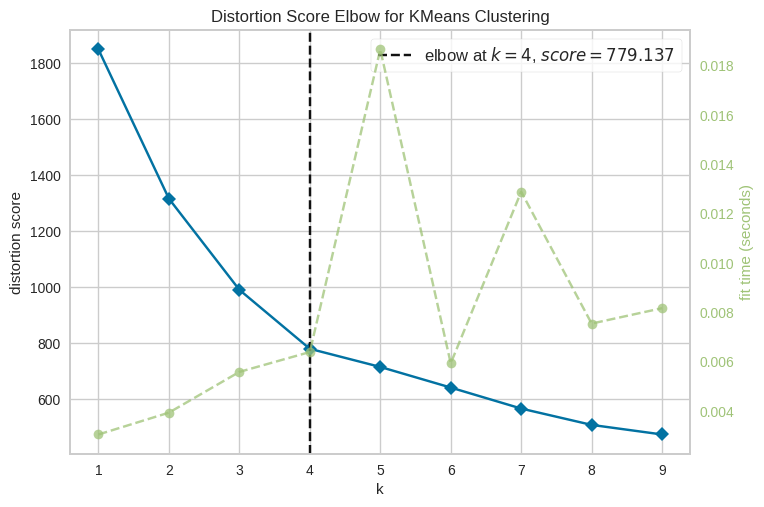

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
## Show the Visualizer Kelbow for optimum cluster number
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(pca_data)
visualizer.show()

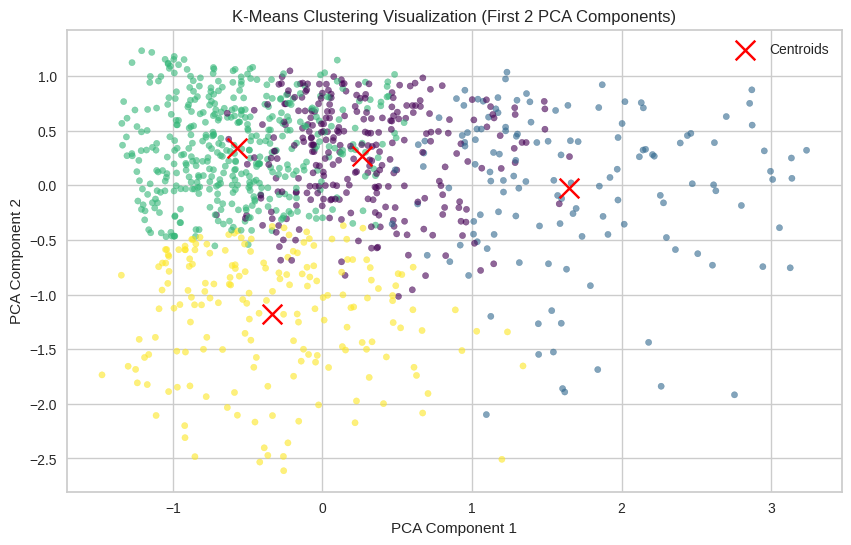

In [68]:
# K-Means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(pca_data)

## Visualize PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=20, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering Visualization (First 2 PCA Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [69]:
# Fit KMeans again
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)  # Use PCA-transformed data

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_data, cluster_labels)
print(f"The average silhouette score is: {silhouette_avg:.4f}")

The average silhouette score is: 0.2946


In [70]:
## Calculate the Performance per cluster Cluster
wcss = []
silhouette_scores = []
cluster_range = range(2, 10)  # Test for 2 to 9 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(pca_data)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

(wcss, silhouette_scores)

([1315.6671859628816,
  990.0210438301027,
  779.0608417367162,
  695.8186133013536,
  623.2558478855076,
  557.9032729219066,
  498.4434790259843,
  453.683880334075],
 [0.34013600015639794,
  0.30539077473029785,
  0.29610947442990926,
  0.2836787833154426,
  0.2771215536351236,
  0.2719214608004881,
  0.27555640847012114,
  0.28224301068712615])

### Notes:
Hasil dari feature selection tidak sesuai harapan, namun let's stick to the visualization and labelin since it was on the bare minimum. Untuk hasil mungkin akan kembali ke cluster awal.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

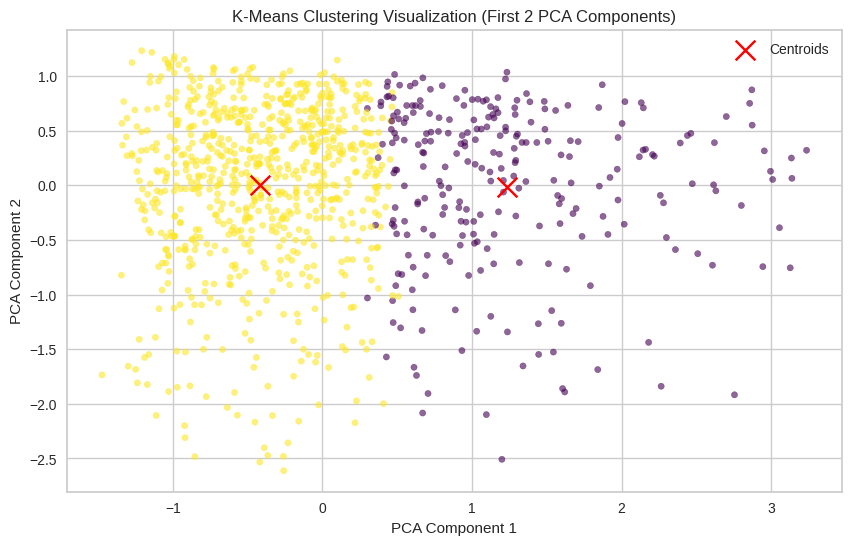

In [71]:
# K-Means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(pca_data)

## Visualize PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=20, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering Visualization (First 2 PCA Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [72]:
## Put the labels
combined_data["Label"] = kmeans_labels

## Merge with the categorical data
combined_data = pd.concat([combined_data, categorical_data], axis=1)

## Print total label
total_label = combined_data["Label"].value_counts()
print(total_label)

## Show the info
combined_data.head()


Label
1    761
0    257
Name: count, dtype: int64


,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass_AAA,publisherClass_Hobbyist,publisherClass_Indie,Label,name,releaseDate,publisherClass,publishers,developers
50,17717,17.99,263733.0,4.766069,92,0,0,1,1,Hookah Haze,10-07-2024,Indie,Aniplex Inc.,ACQUIRE Corp.
51,14679,19.99,263197.0,6.791463,80,0,0,1,1,Future Fragments,22-02-2024,Indie,"Taboo Toad,Shady Corner Games",The Future Fragments Team
52,12312,24.99,263004.0,3.329620,96,0,0,1,1,Botany Manor,09-04-2024,Indie,Whitethorn Games,Balloon Studios
53,66201,4.99,262728.0,10.807865,86,0,0,1,1,Scarlet Tower,25-03-2024,Indie,Pyxeralia LLC,Pyxeralia LLC
54,15742,19.99,260940.0,7.258495,90,0,0,1,1,Vellum,28-03-2024,Indie,"Alvios, Inc.",Alvios Games


In [73]:
cluster_summary = combined_data.groupby("Label").agg({
    "copiesSold": ["mean", "min", "max", "sum"],
    "revenue": ["mean", "min", "max", "sum"],
    "reviewScore" : ["mean", "min", "max", "sum"],
    "avgPlaytime": ["mean", "min", "max", "sum"],
    "price": ["mean", "min", "max", "sum"],
    "publisherClass_Indie" : "sum",
})

# Reset index for better display
cluster_summary = cluster_summary.reset_index()

# Display the summary
cluster_summary


Label    copiesSold                              revenue           \
                 mean  min    max       sum           mean      min   
0     0  17650.062257  710  78590   4536066  237570.278367  21592.0   
1     1  13501.727989  864  84001  10274815  129113.387115  20674.0   

                           reviewScore  ...        avgPlaytime            \
         max           sum        mean  ...    sum        mean       min   
0  1061930.0  6.105556e+07   83.824903  ...  21543   14.220715  6.674226   
1  1045536.0  9.825529e+07   82.448095  ...  62743    4.414950  0.549644   

                               price                      publisherClass_Indie  
         max          sum       mean  min    max      sum                  sum  
0  27.009544  3654.723856  18.211245  0.0  32.00  4680.29                  233  
1  12.383105  3359.776897  13.135322  0.0  29.99  9995.98                  710  

[2 rows x 22 columns]

#### Notes:
Dataset tidak memberikan unit satuan terkait feature yang digunakan. Jadi untuk simplisitas, satuan yang digunakan untuk mata uang adalah Dollar USD ($)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Penjualan Game (Copies Sold): 17650
Rata-rata Pendapatan Game (Revenue): 237570
Rata-rata Waktu Yang Di habiskan pemain (Avgplaytime): 14.220715
Rata-rata Harga Retail Game : 18.211245

Cluster 2:
Rata-rata Penjualan Game (Copies Sold): 13501
Rata-rata Pendapatan Game (Revenue): 129113
Rata-rata Waktu Yang Di habiskan pemain (Avgplaytime): 4.414950
Rata-rata Harga Retail Game : 13.135322

Aspek yang diperhatikan:
1. Basis dari penamaan kluster ini adalah berdasarkan jenis publisher yang dalam game ini, karena hampir 86% publisher bersifat Indie. Jadi bisa dipastikan bahwa kluster dengan publisher Indie terbanyak adalah kluster perusahaan indie.
2. Rata-rata dari pendapatan dari perusahaan non-indie jauh lebih besar meskipun jumlahnya lebih sedikit. di dalam kluster.
3. Average play time and harga dari game publisher non-indie jauh lebih banyak dan mahal ketimbang game indie.

Berdasarkan aspek ini dapat di buat sebuah labeling.

In [74]:
combined_data["Label"] = combined_data["Label"].replace({0: "Non-Indie", 1: "Indie"})
combined_data.head()

,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass_AAA,publisherClass_Hobbyist,publisherClass_Indie,Label,name,releaseDate,publisherClass,publishers,developers
50,17717,17.99,263733.0,4.766069,92,0,0,1,Indie,Hookah Haze,10-07-2024,Indie,Aniplex Inc.,ACQUIRE Corp.
51,14679,19.99,263197.0,6.791463,80,0,0,1,Indie,Future Fragments,22-02-2024,Indie,"Taboo Toad,Shady Corner Games",The Future Fragments Team
52,12312,24.99,263004.0,3.329620,96,0,0,1,Indie,Botany Manor,09-04-2024,Indie,Whitethorn Games,Balloon Studios
53,66201,4.99,262728.0,10.807865,86,0,0,1,Indie,Scarlet Tower,25-03-2024,Indie,Pyxeralia LLC,Pyxeralia LLC
54,15742,19.99,260940.0,7.258495,90,0,0,1,Indie,Vellum,28-03-2024,Indie,"Alvios, Inc.",Alvios Games


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [75]:
## Check if combine_data has missing value
missing_values = combined_data.isnull().sum()
missing_values[missing_values > 0]

## Just Fill the publisher and developers with -
combined_data['publishers'] = combined_data['publishers'].fillna('-')
combined_data['developers'] = combined_data['developers'].fillna('-')

In [76]:
## Check if combine_data has missing value
missing_values = combined_data.isnull().sum()
missing_values[missing_values > 0]

,0


In [77]:
save_csv = combined_data.to_csv('clustered_data_steam.csv', index=False)